# Gaussian Process Modeling of the Ghosted Machine Error Free Operation Profile

In [9]:
# Imports
import altair as alt
import numpy as np

from pandas import DataFrame
# from sklearn.gaussian_process import GaussianProcessClassifier

# Martin Krasser's Gaussian Process visualization
# https://github.com/krasserm/bayesian-machine-learning/blob/dev/gaussian-processes/gaussian_processes_util.py
from external_libraries import plot_gp

# Settings
# alt.data_transformers.disable_max_rows();

## Kernel, Posterior, and Helper Functions

In [10]:
# Squared distance kernel
def kernel(X1, X2, l=1.0, sigma_f=1.0):
    sq_dist = np.sum(X1**2, 1).reshape(-1,1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / l**2 * sq_dist)

In [11]:
# Sample from posterior distribution
def posterior(Xs, Xt, yt, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    K = kernel(Xt, Xt, l, sigma_f) + sigma_y**2 * np.eye(len(Xt))
    Ks = kernel(Xt, Xs, l, sigma_f)
    Kss = kernel(Xs, Xs, l, sigma_f) + 1e-8 * np.eye(len(Xs))
    K_inv = np.linalg.inv(K)

    mu_s = Ks.T.dot(K_inv).dot(yt)
    cov_s = Kss - Ks.T.dot(K_inv).dot(Ks)

    return mu_s, cov_s

In [12]:
# Helper function for plotting uncertainty regions
def plot_sample_uncertainty_region(sample, title=None):
    X = sample.reshape(-1,1)
    mu = np.zeros(X.shape)
    cov = kernel(X,X)
    samples = np.random.multivariate_normal(mu.ravel(), cov, 3)

    return plot_gp(mu, cov, X, samples=samples, title=title)

In [13]:
# Helper function for plotting training data predictions
def plot_training_data_predictions(S, X_t, y_t, title=None):
    X = S.reshape(-1,1)
    Xt = X_t.reshape(-1,1)
    yt = y_t.reshape(-1,1)

    mu_s, cov_s = posterior(X, Xt, yt)

    samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)

    return plot_gp(mu_s, cov_s, X, X_train=Xt, Y_train=yt, samples=samples, title=title)

## Motivation and Expected Outcomes

We expect that random samples drawn from the prior will by-and-large stay within the (95%) confidence interval calculated from our sample data. We hope that the mean of data sampled from a machine in operation is highly covariant with our definition of an ideal latent function&mdash;in this case the _Error Free Machine_.

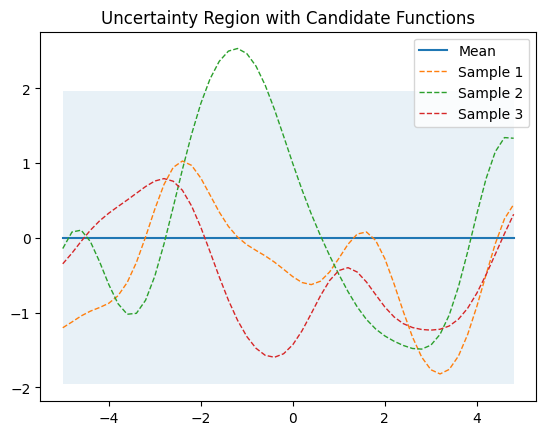

In [14]:
X1 = np.arange(-5, 5, 0.2).reshape(-1, 1)

mu_X1 = np.zeros(X1.shape)
cov_X1 = kernel(X1, X1)

samples1 = np.random.multivariate_normal(mu_X1.ravel(), cov_X1, 3)

plot_gp(mu_X1, cov_X1, X1, samples=samples1, title="Uncertainty Region with Candidate Functions")

We need a dramatically refined Confidence Interval to ensure the safe and appropriate operation of a physical machine, however. Our current model allows the CI to define the Safe Operating Region and thus we only allow operation profiles that fit within it. Our goal is to refine a model such that the ideal mean dominates the machine's "thinking" about _what to do next_.

The plot below is illustrative but insufficiently refined for our purpose. The tail regions, in particular, are too wide and we would expect a flawed workpiece from Sample 2.

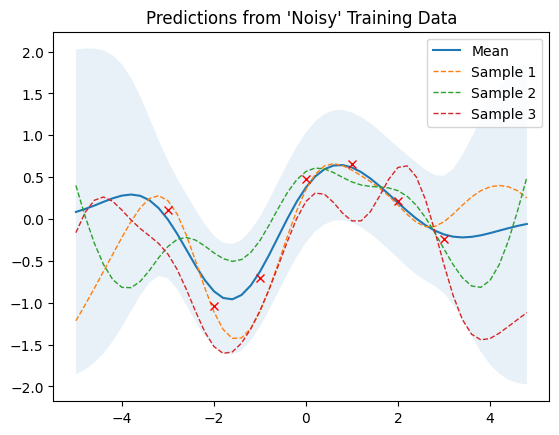

In [15]:
noise2 = 0.4

X2_train = np.arange(-3, 4, 1).reshape(-1, 1)
Y2_train = np.sin(X2_train) + noise2 * np.random.randn(*X2_train.shape)

mu2_s, cov2_s = posterior(X1, X2_train, Y2_train, sigma_y=noise2)

samples2 = np.random.multivariate_normal(mu2_s.ravel(), cov2_s, 3)
plot_gp(mu2_s, cov2_s, X1, X_train=X2_train, Y_train=Y2_train, samples=samples2, title="Predictions from 'Noisy' Training Data")

Refining model parameters enables our sampled functions to track the Confidence Interval much more closely, despite the majority of datapoints falling outside it. In this example, the machine neglects some of it's own feedback and refuses to adjust its operation based on what is presumed to be "false" information. This result is much closer to a viable definition for _Safe Operating Region_.

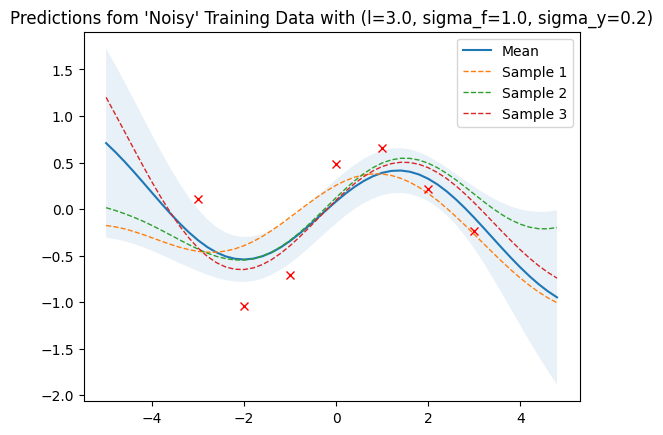

In [18]:
mu2_s, cov2_s = posterior(X1, X2_train, Y2_train, l=3.0, sigma_f=1.0, sigma_y=0.2)

samples3 = np.random.multivariate_normal(mu2_s.ravel(), cov2_s, 3)
plot_gp(mu2_s, cov2_s, X1, X_train=X2_train, Y_train=Y2_train, samples=samples3, title="Predictions fom 'Noisy' Training Data with (l=3.0, sigma_f=1.0, sigma_y=0.2)")

We now seek to replicate some of these results using data which more accurately reflect feedback of physical sensors attached to a machine in operation.

## Data from Machine Profiles

In [ ]:
# Sample for 90 seconds at 60 hertz
# WARN: Takes at least >3min to compute samples
"""
from helpers.plot_samples import (
    # Latent Functions
    bit_angular_velocity,
    forward_infrared_degrees_celcius,
    rear_infrared_degrees_celcius,
    welder_arm_displacement,

    # Samples
    bit_angular_velocity_samples,
    forward_infrared_degrees_celcius_samples,
    rear_infrared_degrees_celcius_samples,
    welder_arm_displacement_samples,

    # Plots
    error_free_machine_profile_plot
)
""";

In [ ]:
# Sample for 90 seconds at 6 hertz
from helpers.plot_samples import (
    # Latent Functions
    bit_angular_velocity_short,
    forward_infrared_degrees_celcius_short,
    rear_infrared_degrees_celcius_short,
    welder_arm_displacement_short,

    # Samples
    bit_angular_velocity_samples_short,
    forward_infrared_degrees_celcius_samples_short,
    rear_infrared_degrees_celcius_samples_short,
    welder_arm_displacement_samples_short,

    # Plots
    error_free_machine_profile_plot_short
)

## Visualize Latent Functions and Samples Drawn from Them

In [ ]:
# error_free_machine_profile_plot

In [ ]:
error_free_machine_profile_plot_short

alt.VConcatChart(...)

## Uncertainty Regions in Sample Data

Plot sample functions and uncertainty regions for our "sensors". Note that due to edge-case consistency the Error Free Machine profiles sample in an awkwardly "flat" way. This means a confidence interval may or may not be calculable, depending on the specific sample.

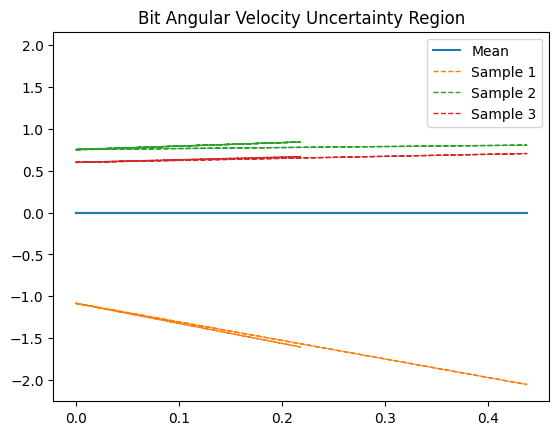

In [ ]:
# Bit Angular Velocity
plot_sample_uncertainty_region(
    bit_angular_velocity_samples_short,
    title="Bit Angular Velocity Uncertainty Region"
)

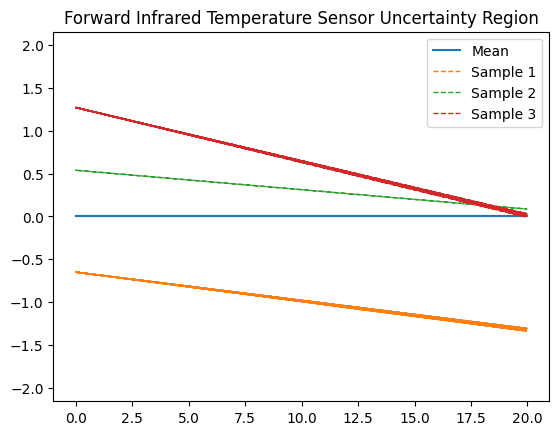

In [ ]:
# Forward Infrared Temperature Sensor
plot_sample_uncertainty_region(
    forward_infrared_degrees_celcius_samples_short,
    title="Forward Infrared Temperature Sensor Uncertainty Region"
)

In [ ]:
# Rear Infrared Temperature Sensor
plot_sample_uncertainty_region(
    rear_infrared_degrees_celcius_samples_short,
    title="Rear Infrared Temperature Sensor Uncertainty Region"
)

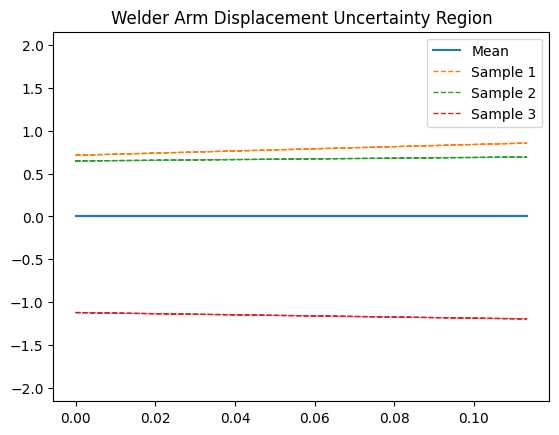

In [ ]:
# Welder Arm Displacement
plot_sample_uncertainty_region(
    welder_arm_displacement_samples_short,
    title="Welder Arm Displacement Uncertainty Region"
)

## Predictions from the Posterior

Use sample data to draw predictions from a posterior distribution constructed from training data. The aggressively regular character of the Error Free Machine's latent functions likely dominate the abnormal means, effectively "tracking" samples tightly to the latent function itself.

> For the majority of predictive models "overfitting" is a highly undesirable characteristic. In this case, however, we are using latent functions to represent de facto sources of truth with deliberately minimized error to (help) ensure the machine operates as close to an ideal steady state as possible for its entire operation.

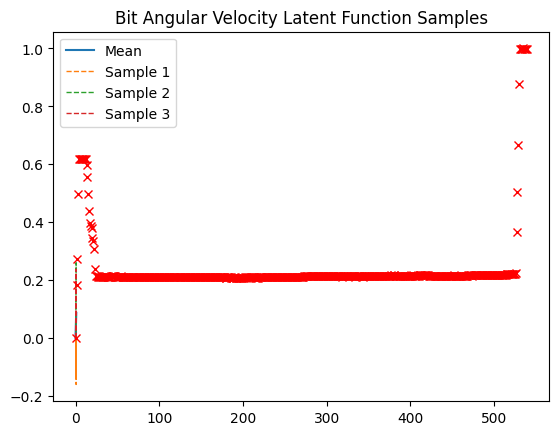

In [ ]:
# Bit Angular Velocity
plot_training_data_predictions(
    bit_angular_velocity_samples_short,
    np.arange(0, np.shape(bit_angular_velocity_short)[0]),
    bit_angular_velocity_short,
    title="Bit Angular Velocity Latent Function Samples"
)

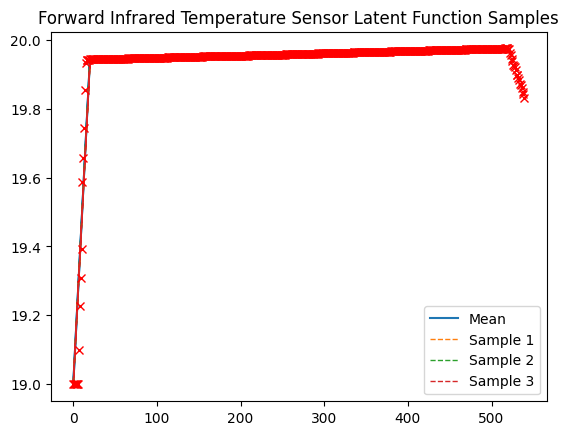

In [ ]:
# Forward Infrared Temperature Sensor
plot_training_data_predictions(
    forward_infrared_degrees_celcius_samples_short,
    np.arange(0, np.shape(forward_infrared_degrees_celcius_short)[0]),
    forward_infrared_degrees_celcius_short,
    title="Forward Infrared Temperature Sensor Latent Function Samples"
)

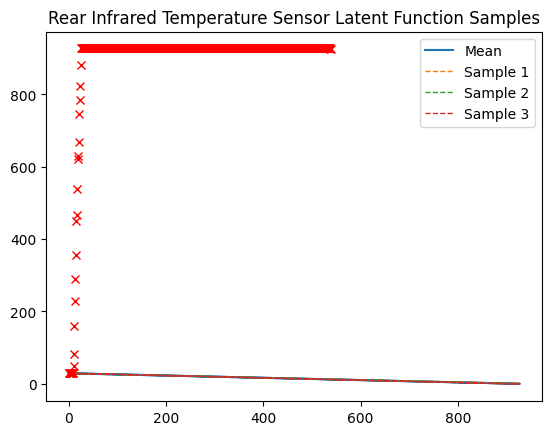

In [ ]:
# Rear Infrared Temperature Sensor
plot_training_data_predictions(
    rear_infrared_degrees_celcius_samples_short,
    np.arange(0, np.shape(rear_infrared_degrees_celcius_short)[0]),
    rear_infrared_degrees_celcius_short,
    title="Rear Infrared Temperature Sensor Latent Function Samples"
)

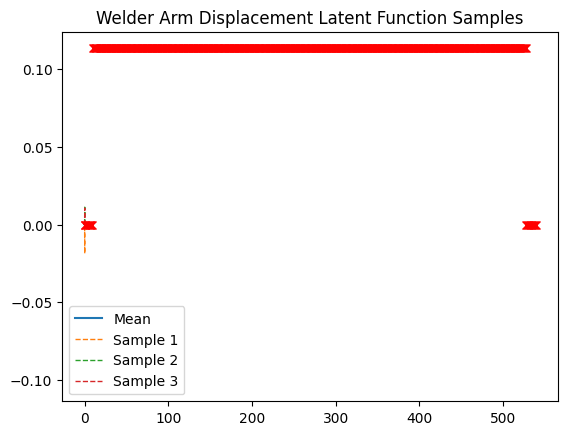

In [ ]:
# Welder Arm Position
plot_training_data_predictions(
    welder_arm_displacement_samples_short,
    np.arange(0, np.shape(welder_arm_displacement_short)[0]),
    welder_arm_displacement_short,
    title="Welder Arm Displacement Latent Function Samples"
)

## Enhancements and Improvements

1. Utilize improved implementations
    - Squared distance is a relatively naive kernel
    - "Hand rolled" methods used to make logical explicit clear are underoptimized
    - Robust methods easily avaialble
        - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.gaussian_process
        - https://gpflow.github.io/GPflow/2.9.0/index.html
1. Add "machines" with less-than-ideal operation profiles
    - The _Error Free Machine_ lacks essential variance (as noted above)
1. Evaluate how operation profiles with more variance respond to the _Error Free Machine_'s latent functions
    - Questions
        - Do Uncertainty Regions (light blue) appear in plots of profiles with greater variance?
        - Does sampling from an ideal posterior (e.g. the _Error Free Machine_) credibly "track" the machine's operation toward the Safe Operating Region?
        - What are the computational costs of processing more variance?
1. Investigate sparse proccesses
    - Dense processes scale at approximately $O(n^3)$
    - If it is possible to identify a small(er) set of inducing features ($m$), time complexity may be reducible to $O(nm^2)$
    - Reference
        - https://krasserm.github.io/2020/12/12/gaussian-processes-sparse/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=551a4279-ff3a-4b51-916a-b3bd6353d4bf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>